# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb
from pywaffle import Waffle
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\B4der PC\Desktop\Scrapping\airline_delay_causes.csv")

In [2]:
df.shape

(20946, 22)

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               14
arr_del15                 19
carrier_ct                14
 weather_ct               14
nas_ct                    14
security_ct               14
late_aircraft_ct          14
arr_cancelled             14
arr_diverted              14
 arr_delay                14
 carrier_delay            14
weather_delay             14
nas_delay                 14
security_delay            14
late_aircraft_delay       14
Unnamed: 21            20946
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1    month               20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9    weather_ct          20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15   arr_delay           20932 non-null 

In [6]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,20946.0,20946.000000,20932.000000,20927.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,0.0
mean,2019.0,6.548124,354.578492,66.385674,18.529209,2.212045,20.996112,0.126231,24.506268,6.445872,0.901968,4581.010940,1402.300783,252.364848,1100.938945,6.377030,1819.029333,NaN
std,0.0,3.454813,994.222826,177.396659,44.285872,6.821045,67.444734,0.545841,68.196091,26.798972,3.937406,13349.726176,3859.290938,903.289207,4239.372921,40.753285,5278.977954,NaN
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.0,4.000000,48.000000,7.000000,2.130000,0.000000,1.320000,0.000000,2.000000,0.000000,0.000000,402.750000,115.000000,0.000000,48.000000,0.000000,114.000000,NaN
50%,2019.0,7.000000,93.000000,18.000000,5.990000,0.530000,4.260000,0.000000,6.180000,1.000000,0.000000,1154.000000,380.000000,24.000000,166.000000,0.000000,422.000000,NaN
75%,2019.0,10.000000,237.000000,46.000000,15.062500,1.930000,11.990000,0.000000,16.740000,4.000000,1.000000,3100.250000,1085.000000,169.000000,513.000000,0.000000,1257.000000,NaN
max,2019.0,12.000000,21873.000000,3714.000000,966.330000,175.560000,1485.820000,12.510000,1429.550000,933.000000,115.000000,329847.000000,97970.000000,23749.000000,97283.000000,3194.000000,125086.000000,NaN


We have few data quality issues we need to change:
1. Strip columns names
2. Convert columns into intger
3. Get rid of Nulls 
4. Get rid of "Unnamed: 21" column
5. Split 'airport_name' information in 'airport_city', 'airport_state', and 'airport_name
6. Fill 5 missing 'arr_del15' records with 0

In [7]:
#strip column names:
df.rename(columns=lambda column: column.strip(), inplace=True)
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [8]:
#convert columns into integrs
df = df.convert_dtypes()
df.dtypes

year                     Int64
month                    Int64
carrier                 string
carrier_name            string
airport                 string
airport_name            string
arr_flights              Int64
arr_del15                Int64
carrier_ct             Float64
weather_ct             Float64
nas_ct                 Float64
security_ct            Float64
late_aircraft_ct       Float64
arr_cancelled            Int64
arr_diverted             Int64
arr_delay                Int64
carrier_delay            Int64
weather_delay            Int64
nas_delay                Int64
security_delay           Int64
late_aircraft_delay      Int64
Unnamed: 21              Int64
dtype: object

In [9]:
#get rid of nulls
df.dropna(subset=['arr_flights'], inplace=True)
df.shape

(20932, 22)

In [10]:
# get rid of "unnamed: 21"
df.drop(columns='Unnamed: 21', inplace=True)
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [11]:
#splitting information
df[["airport_city", "airport_state", "airport_name"]] = df.airport_name.str.extract(r'(.*), (.*): (.*)')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,airport_city,airport_state
0,2019,1,MQ,Envoy Air,SAV,Savannah/Hilton Head International,65,15,3.41,0.71,...,1,1,601,180,29,129,0,263,Savannah,GA
1,2019,1,MQ,Envoy Air,SDF,Louisville Muhammad Ali International,61,18,2.7,1.01,...,1,0,890,180,36,383,0,291,Louisville,KY
2,2019,1,MQ,Envoy Air,SGF,Springfield-Branson National,428,80,13.31,5.18,...,15,0,3954,705,213,982,0,2054,Springfield,MO
3,2019,1,MQ,Envoy Air,SHV,Shreveport Regional,174,28,5.97,1.17,...,0,0,1655,360,55,268,0,972,Shreveport,LA
4,2019,1,MQ,Envoy Air,SJT,San Angelo Regional/Mathis Field,135,23,10.78,0.35,...,2,0,835,320,27,192,0,296,San Angelo,TX


In [12]:
# Fill missing 'arr_del15' records with 0
df.arr_del15.fillna(0, inplace=True)
df.arr_del15.isna().sum()

0

What is the structure of your dataset?

This dataset is constructed with 20932 rows and 23 columns, most of the columns are intger/float values

What is/are the main feature(s) of interest in your dataset?

I'm intrested about finding out the relationships between flights delayes and other columns

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that *_ct features give me what is the main cause of the flight delay, Along side airport_name, carrier_name, and the month has more delays number 

Univariate Analysis:

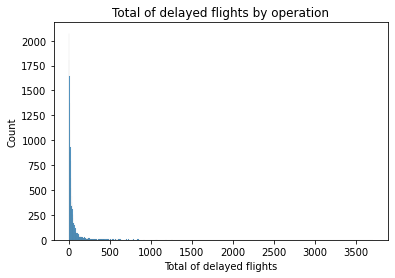

In [13]:
sb.histplot(x=df.arr_del15);
plt.title("Total of delayed flights by operation")
plt.xlabel("Total of delayed flights");

In [14]:
df.arr_del15.describe()

count    20932.000000
mean        66.369817
std        177.378436
min          0.000000
25%          7.000000
50%         18.000000
75%         46.000000
max       3714.000000
Name: arr_del15, dtype: float64

In [15]:
def log(values, binsize):
    return 10 ** np.arange(values.min(), np.log10(values.max()) + binsize, binsize)

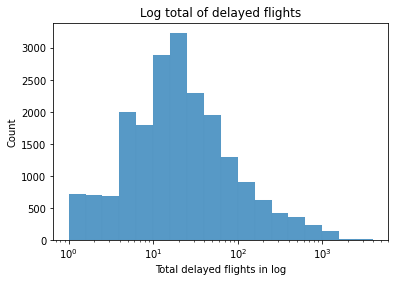

In [16]:
#lets look at the chart closely
sb.histplot(x=df.arr_del15, bins=log(df.arr_del15, 0.2));
plt.xscale('log');
plt.title('Log total of delayed flights')
plt.xlabel('Total delayed flights in log');

As we can conclude from tha chart above, the peak records around 16, positively skewed.

Distribution of OPS per month:

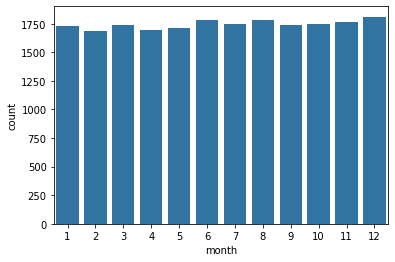

In [17]:
sb_color = sb.color_palette()[0]
sb.countplot(x=df.month, color=sb_color);

Distribution of delay causes:

In [18]:
data = df.sum()
data = data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']] / data.arr_del15 * 100
data.sort_values(ascending=False, inplace=True)

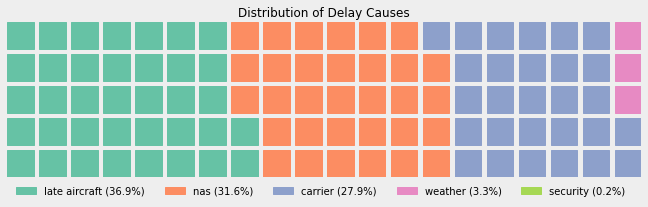

In [19]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data.apply(round),
    title={'label': 'Distribution of Delay Causes'},
    labels=['{} ({:.1f}%)'.format(k.replace('_ct', '').replace('_', ' '), v) for k, v in data.items()],
    legend={'loc': 'lower left','bbox_to_anchor': (0, -0.18), 'ncol': 5 , 'framealpha': 0},
    figsize=(10, 6)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')

Given to the chart above, we can safely say that the main cause is late Aircrafts.

OPS per company:

In [20]:
carrier_name_order = df.carrier_name.value_counts().index

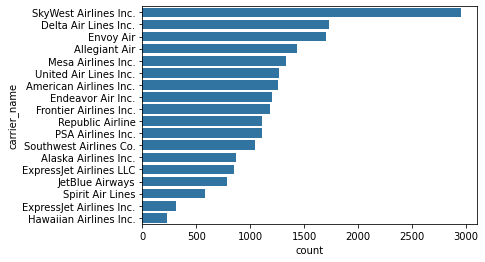

In [21]:
sb.countplot(y=df.carrier_name, color=sb_color, order=carrier_name_order);

With almost double of records of the seconed place, SkyWest has the highest.


Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The total delayed flights had a long tail, thus I used log scale to look closly on the chart, the main cause of delay is late aircrafts.

Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Suprisingly, the dataset is quite clean compared on other projects.

Bivariate analysis:

corralation between delays and months

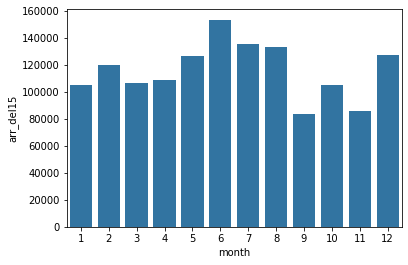

In [24]:
data = df.groupby('month').sum().arr_del15.reset_index()
sb.barplot(x=data.month, y=data.arr_del15, color=sb_color);

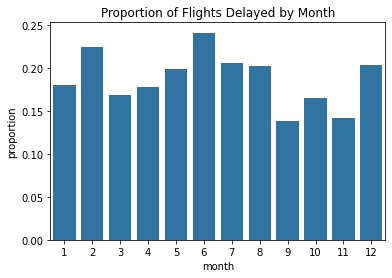

In [26]:
data = df.groupby('month').sum()
data = (data.arr_del15 / data.arr_flights).reset_index().rename(columns={0: 'proportion'})
sb.barplot(x=data.month, y=data.proportion, color=sb_color);
plt.title('Proportion of Flights Delayed by Month');

In [27]:
data = df.groupby('carrier_name').sum()
data = data.arr_del15.div(data.arr_flights, axis='index').reset_index().rename(columns={0: 'proportion'})

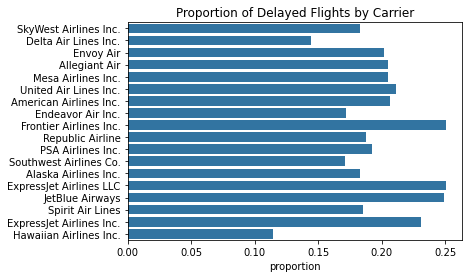

In [28]:
sb.barplot(y=data.carrier_name, x=data.proportion, order=carrier_name_order, color=sb_color)
plt.title('Proportion of Delayed Flights by Carrier');
plt.ylabel('');

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Based on the analysis done so far, June appears to be th month with most delays, on the otherhand, Septermber has the least delays.

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The total flights can be misleading, so it's best to use proporion.

Multivariate Analysis:

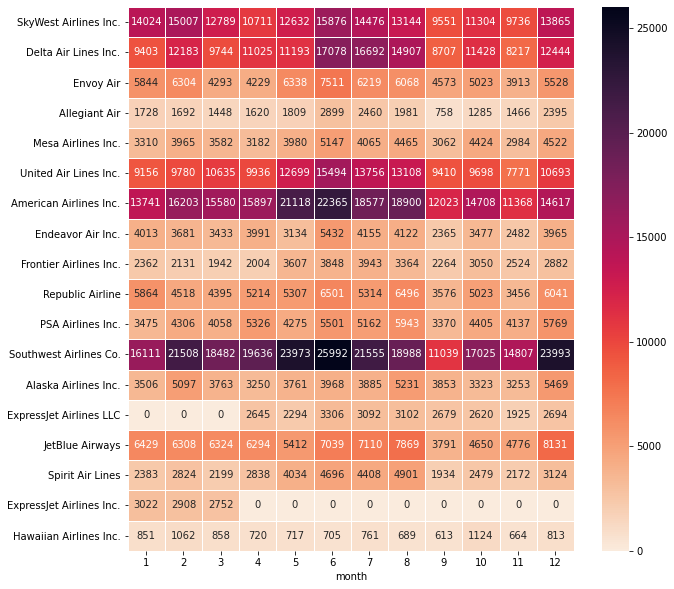

In [23]:
data = df.groupby(['month', 'carrier_name']).sum().arr_del15
data = data.reset_index().pivot(index='carrier_name', columns='month', values='arr_del15')
data = data.fillna(0).reindex(carrier_name_order).astype(int)
plt.figure(figsize=(10,10))
sb.heatmap(data, cmap='rocket_r', annot=True, fmt="d", linewidths=.5);

As we can see above, the Expressjet airlines changed names, thus we will need to work on that.

In [24]:
df.replace('ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC', inplace=True)
carrier_name_order = carrier_name_order.drop(['ExpressJet Airlines Inc.'])

In [25]:
df.carrier_name.unique()

<StringArray>
[              'Envoy Air',        'Spirit Air Lines',
       'PSA Airlines Inc.',   'SkyWest Airlines Inc.',
   'United Air Lines Inc.',  'Southwest Airlines Co.',
      'Mesa Airlines Inc.',        'Republic Airline',
       'Endeavor Air Inc.',  'American Airlines Inc.',
    'Alaska Airlines Inc.',         'JetBlue Airways',
    'Delta Air Lines Inc.', 'ExpressJet Airlines LLC',
  'Frontier Airlines Inc.',           'Allegiant Air',
  'Hawaiian Airlines Inc.']
Length: 17, dtype: string

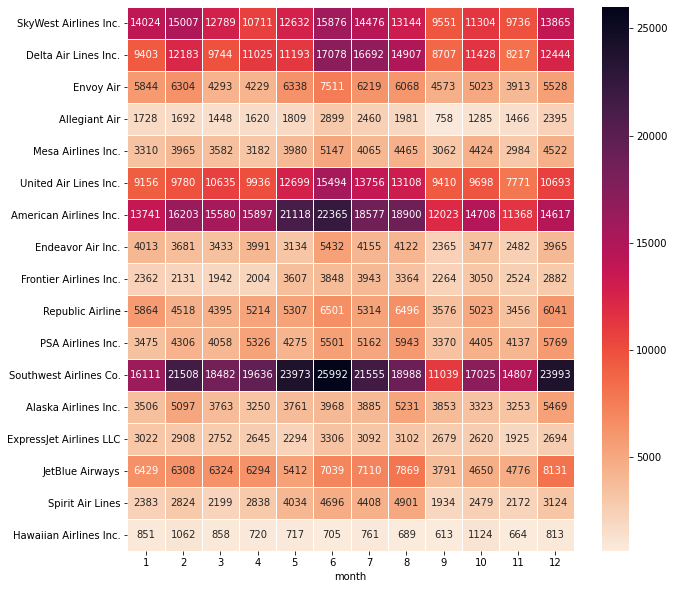

In [26]:
data = df.groupby(['carrier_name', 'month']).sum().arr_del15
data = data.reset_index().pivot(index='carrier_name', columns='month', values='arr_del15')
data = data.fillna(0).reindex(carrier_name_order).astype(int)
plt.figure(figsize=(10,10))
sb.heatmap(data, cmap='rocket_r', annot=True, fmt="d", linewidths=.5);

Now, this looks good but let's take the proportion to smooth out the data.

In [27]:
data = df.groupby(['carrier_name', 'month']).sum()
data = data.arr_del15.div(data.arr_flights, axis='index')
data = data.reset_index().rename(columns={0: 'proportion'})
data = data.pivot(index='carrier_name', columns='month', values='proportion')
data = data.reindex(carrier_name_order).fillna(0).astype(float)

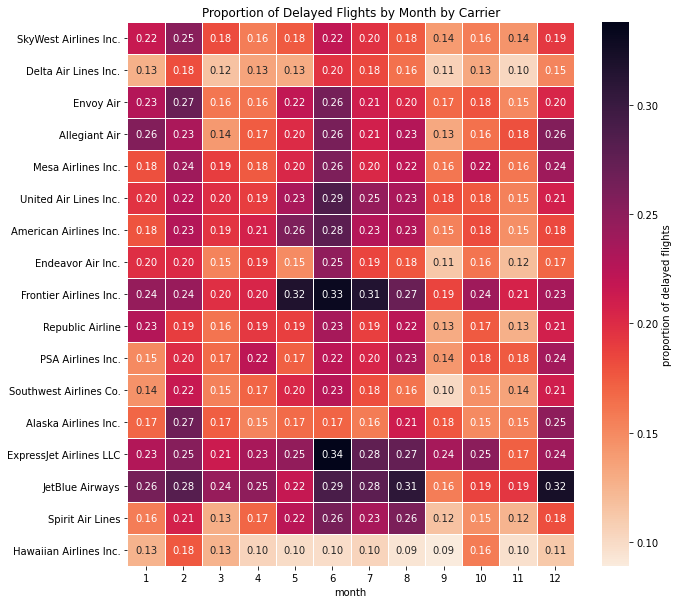

In [28]:
plt.figure(figsize=(10,10))
sb.heatmap(data, cmap='rocket_r', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'proportion of delayed flights'});
plt.title('Proportion of Delayed Flights by Month by Carrier');

Looking at the chart above, we can conclude that Hawaiian Airlines has a low and relativly consistant delay proportion.

Now, we will try to figure out the cause of these delays.

c:\users\b4der pc\desktop\scrapping\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\b4der pc\desktop\scrapping\venv\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


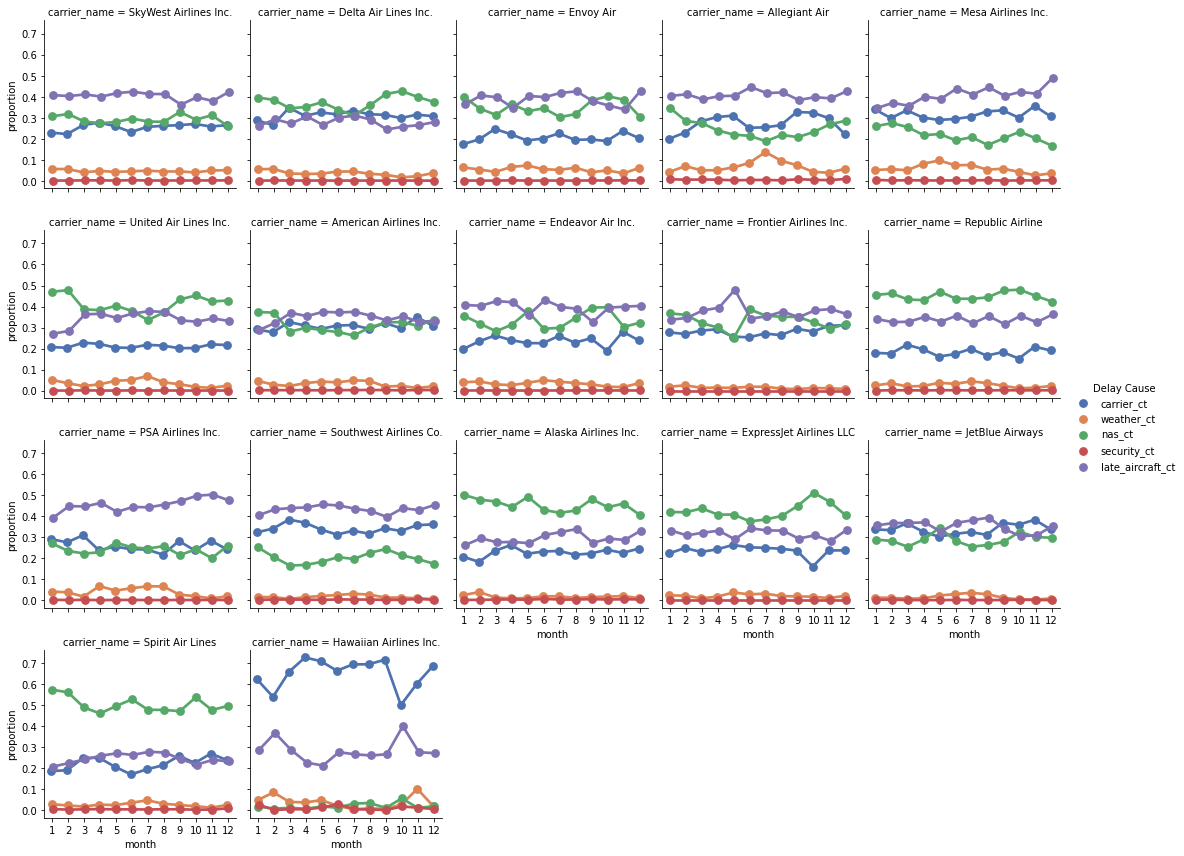

In [29]:
data = df.groupby(['carrier_name', 'month']).sum()
data = data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].div(data.arr_del15, axis='index')
data = data.reset_index()
data = pd.melt(data, id_vars=['month', 'carrier_name'], var_name='cause', value_name='proportion')

grid = sb.FacetGrid(data, col='carrier_name', col_wrap=5, col_order=carrier_name_order)
grid.map(sb.pointplot, 'month', 'proportion', 'cause', palette='deep', dodge=True)
grid.add_legend()
grid.legend.set_title('Delay Cause')
grid.fig.suptitle('Proportion of Delay Cause by Month by Carrier', y=1.015);

So basically one of the main causes of delay is the National Aviation System, for more information about that look at this:
https://en.wikipedia.org/wiki/National_Airspace_System

Lastly, we will compare percentage of delayed flights due to carrier problems:

In [30]:
data = df.groupby(['carrier_name', 'month']).sum()
data = data.carrier_ct.div(data.arr_del15, axis='index')
data = data.reset_index().rename(columns={0: 'proportion'})

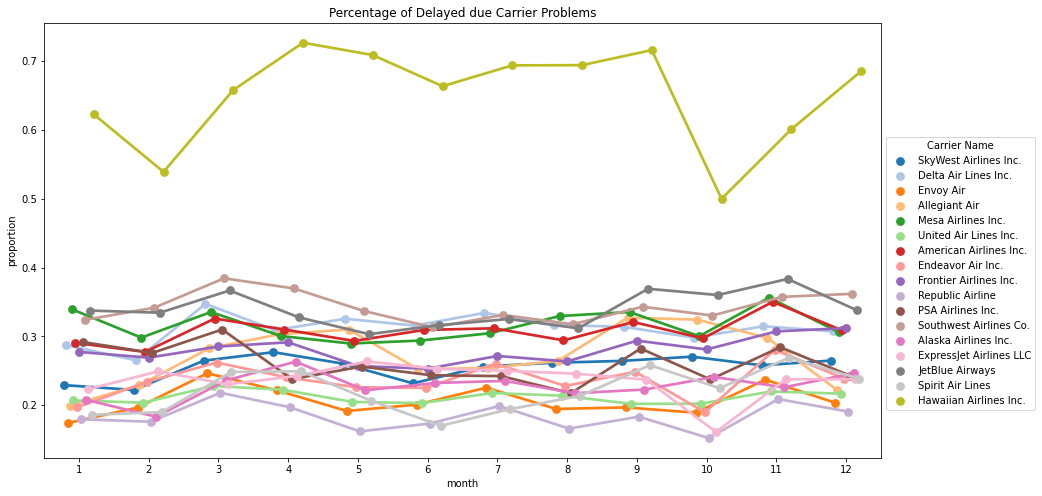

In [31]:
plt.figure(figsize=(15,8))
sb.pointplot(data=data, x='month', y='proportion', hue='carrier_name', dodge=True, hue_order=carrier_name_order, palette='tab20');
plt.legend(bbox_to_anchor=(1, 0.75), title='Carrier Name');
plt.title('Percentage of Delayed due Carrier Problems');

Based on the chart above, we can safely say that hawaiian airlines in comparison with other carriers, they have many problems to adress and resolve.

Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

35% of causes in delayed flights, is actually due to NAS, which means the carriers has nothing to do with it.

Were there any interesting or surprising interactions between features?

Hawaiian airlines has many problems, which means there is something wrong there that they need to work on, also a good opportunity for re-evaluating the company and taking serious strategic changes.

In [32]:
df.to_csv("airline_delay_causes_cleaned.csv", index = False)